<a href="https://colab.research.google.com/github/augnoel/noel/blob/develop/standardA_clustering_answer4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 패키지 호출

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. K-means 실습

In [ ]:
#music dataset 불러오기
df_bts = pd.read_csv("/content/drive/MyDrive/nbcamp_data/Spotify_BTS_AudioFeatures.csv") #Google Drive의 파일 경로를 잘 확인해주세요.

In [ ]:
df_bts.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [ ]:
#데이터 전처리

#1. 칼럼 성격에 따라 info용 DataFrame과 분석용 DataFrame으로 분리
df_bts_info = df_bts[["Title",	"Artist",	"Release"]]
df_bts_anal = df_bts.drop(["Unnamed: 0", "Title",	"Artist",	"Release", "key",	"id"], axis = 1)

#2. 분석용 DataFrame 스케일링 진행
scaler = StandardScaler()
df_bts_anal_s = pd.DataFrame(data = scaler.fit_transform(df_bts_anal), columns = df_bts_anal.columns)
df_bts_anal_s["duration"] = df_bts_anal_s["duration_ms"]
df_bts_anal_s = df_bts_anal_s.drop(["duration_ms"], axis = 1)

In [ ]:
df_bts_anal_s.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-0.387776,-0.279935,0.329929,-1.123182,-0.090282,1.245994,-0.147170,0.233761,1.198595,-0.756189,0.003835
1,-1.745654,0.747749,-0.271117,0.890327,2.904543,-0.643637,-0.141153,2.051508,0.371794,1.683076,-0.300891
2,1.211917,1.344238,-0.232650,-1.123182,0.220978,-0.665193,-0.123590,-0.024944,1.728596,0.823738,-0.189335
3,0.914300,1.408917,1.307231,-1.123182,1.179995,0.749108,-0.147170,-0.487891,0.721594,-0.119667,0.456246
4,0.263262,0.208754,-1.130613,0.890327,-0.261054,-0.675204,-0.147170,0.717132,0.016693,-1.060753,0.879516


In [ ]:
#K-means 실행
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=6, random_state=0, init="random").fit(df_bts_anal_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_bts_anal_s.columns)
df_centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.989777,-0.501891,-0.284710,0.348229,-0.350355,-0.320615,-0.075989,-0.089149,0.719760,-0.357136,-1.074396
1,-0.786499,-0.957331,-0.840017,0.175856,-0.076714,0.543147,-0.146676,-0.178718,-1.234793,0.190314,0.265136
2,0.737590,-3.190512,-5.056046,0.890327,6.370463,5.579139,-0.147170,4.870037,0.011393,-0.235405,-1.546004
3,1.783900,-1.469319,-1.279071,-0.116427,-0.286712,1.409309,8.013530,-0.761915,-0.298657,-0.337427,-0.705430
4,-0.125999,0.687277,0.533625,0.890327,0.123845,-0.220250,-0.125107,0.073922,0.159793,0.343248,0.572853
5,-0.010699,0.449505,0.416924,-1.123182,0.013319,-0.171067,-0.091910,0.032199,0.295635,-0.212545,-0.017719


In [ ]:
#(practice) 군집별 size 추가해보기
df_centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,size
0,0.989777,-0.501891,-0.284710,0.348229,-0.350355,-0.320615,-0.075989,-0.089149,0.719760,-0.357136,-1.074396,26
1,-0.786499,-0.957331,-0.840017,0.175856,-0.076714,0.543147,-0.146676,-0.178718,-1.234793,0.190314,0.265136,31
2,0.737590,-3.190512,-5.056046,0.890327,6.370463,5.579139,-0.147170,4.870037,0.011393,-0.235405,-1.546004,1
3,1.783900,-1.469319,-1.279071,-0.116427,-0.286712,1.409309,8.013530,-0.761915,-0.298657,-0.337427,-0.705430,2
4,-0.125999,0.687277,0.533625,0.890327,0.123845,-0.220250,-0.125107,0.073922,0.159793,0.343248,0.572853,41
5,-0.010699,0.449505,0.416924,-1.123182,0.013319,-0.171067,-0.091910,0.032199,0.295635,-0.212545,-0.017719,46


In [ ]:
#Centroid 시각화를 통해 각 군집의 특성 파악
import plotly.graph_objects as go

def plot_radar_from_centroid(df_centroids):
  df_centroids = df_centroids.drop(['size'], axis = 1)
  fig = go.Figure()
  categories = df_centroids.columns
  for row in df_centroids.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1].tolist(),
        theta=categories,
        fill='toself',
        name='cluster {}'.format(row[0])
    ))

  fig.update_layout(
      autosize=False,
      width=1000,
      height=800,
  )
  fig.show()

In [ ]:
plot_radar_from_centroid(df_centroids)

In [ ]:
#K-means++ 로 초기값 지정
kmeans_pp = KMeans(n_clusters=6, random_state=0).fit(df_bts_anal_s)

df_centroids_pp = pd.DataFrame(kmeans_pp.cluster_centers_, columns=df_bts_anal_s.columns)

c2 = Counter()
c2.update(kmeans_pp.labels_)
label_counts2 = [c2[x] for x in df_centroids_pp.index]
df_centroids_pp['size'] = label_counts2

df_centroids_pp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,size
0,-0.792551,0.542775,0.403884,0.627696,0.803667,0.001485,-0.142108,-0.006592,-0.182172,1.536120,0.684173,23
1,0.465671,-0.099136,-0.095785,-1.123182,-0.397491,-0.127557,-0.059014,-0.177158,0.171509,-0.069690,-0.212509,38
2,0.475182,0.018309,-0.006699,0.890327,-0.387761,-0.383859,-0.104683,-0.311498,0.228441,-0.330477,-0.220924,42
3,-0.343930,1.031449,1.142601,-0.643775,0.587640,-0.207272,-0.144956,0.844248,0.633261,-0.690274,0.005188,21
4,-0.750939,-1.343211,-1.276410,0.219158,0.054252,1.069961,-0.146441,0.179102,-1.172528,-0.172948,0.139052,21
5,1.783900,-1.469319,-1.279071,-0.116427,-0.286712,1.409309,8.013530,-0.761915,-0.298657,-0.337427,-0.705430,2


In [ ]:
plot_radar_from_centroid(df_centroids_pp)

In [ ]:
#Silhouette 계수 계산
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(df_bts_anal_s, kmeans_pp.labels_)
print(silhouette_avg)

0.1287758901616854


In [ ]:
#K값에 따른 Silhouette 계수 비교
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_bts_anal_s)
    silhouette_avg = silhouette_score(df_bts_anal_s, kmeans.labels_)
    print("k = {} -> silhouette index {}".format(k, silhouette_avg))

k = 3 -> silhouette index 0.1293074471817606
k = 4 -> silhouette index 0.11272763057879343
k = 5 -> silhouette index 0.12084243636186956
k = 6 -> silhouette index 0.1287758901616854
k = 7 -> silhouette index 0.14013540847592046
k = 8 -> silhouette index 0.12959825694522073
k = 9 -> silhouette index 0.126616221665096


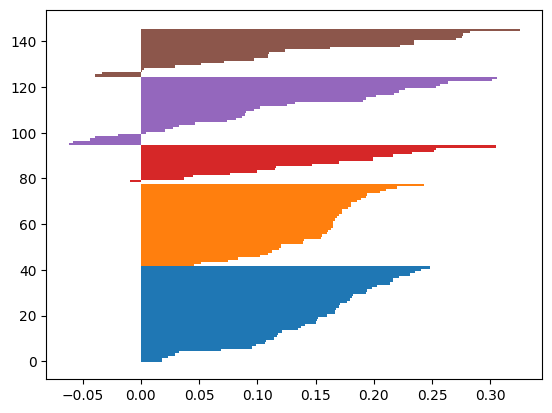

In [ ]:
#Silhouette 계수 시각화
k = 7

#(practice)